[Текст ссылки](https://)# Распознавание фруктов из набора Fruits-360

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU для ускорения обучения нейронной сети (Среда Выполнения -> Сменить среду выполнения -> Аппаратный ускоритель -> GPU).

## Набор данных

[Fruits-360](https://github.com/Horea94/Fruit-Images-Dataset) - набор изображений фруктов.

**Количество классов в наборе данных**: 131.


**Размеры изображений**: 100х100.

**Формат изображений**: jpg.

**Статья с описанием набора данных**: Horea Muresan, Mihai Oltean, [Fruit recognition from images using deep learning](https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning), Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загружаем данные

In [4]:
zip_file = '/content/drive/MyDrive/Fruit-Images-Dataset-master.zip'

In [7]:
import zipfile
z = zipfile.ZipFile(zip_file,'r')
z.extractall()

## Создаем Tensorflow Dataset'ы

* Батч -  это небольшой пакет данных одной итерации; batch_size - общее число тренировочных объектов, представленных в одном батче.
* Итерации — число батчей, необходимых для завершения одной эпохи.

Число батчей равно числу итераций для одной эпохи.
Например, собираемся использовать 2000 тренировочных объектов. Можно разделить полный датасет из 2000 объектов на батчи размером 500 объектов. Таким образом, для завершения одной эпохи потребуется 4 итерации.

In [8]:
batch_size=128
image_size=(100, 100)

**Набор данных для обучения**

In [9]:
train_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.3,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 47385 files for training.


**Проверочный набор данных**

In [10]:
validation_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.3,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 20307 files for validation.


Названия классов в наборах данных.

In [11]:
class_names = train_dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

**Примеры изображений**

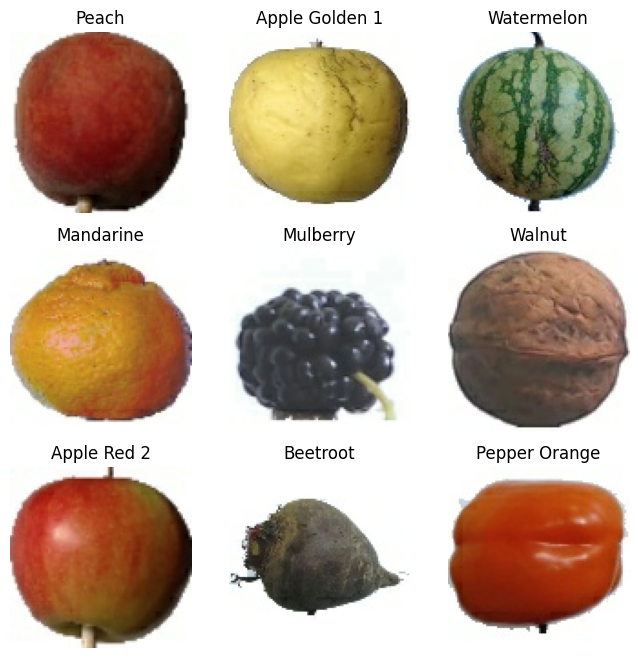

In [12]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Набор данных для тестирования**

In [13]:
test_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 22688 files belonging to 131 classes.


In [14]:
test_dataset.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

## Настраиваем производительность TensorFlow DataSet'ов

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

## Класс Sequential
Для описания стандартных архитектур нейронных сетей в Keras уже существуют предопределенные классы для слоев:

* Dense() – полносвязный слой;
* Conv1D, Conv2D, Conv3D – сверточные слои;
* Conv2DTranspose, Conv3DTranspose – транспонированные (обратные) светочные слои;
* SimpleRNN, LSTM, GRU – рекуррентные слои;
* MaxPooling2D, Dropout, BatchNormalization – вспомогательные слои.

А также предопределенные классы моделей:

* Model – общий класс модели;
* Sequential – последовательная модель.

Представим архитектуру нейронной сети:
![нс](https://proproprogs.ru/htm/tensorflow/files/keras-posledovatelnaya-model-sequential.files/image001.png)

Теоретически, число скрытых слоев может быть сколь угодно большим. Для описания такой модели  и применяется класс Sequential.
Пример создания последовательной модели нейронной сети:

```
model = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
```
Методом add() можно добавлять слои в нейронную сеть:

```
model.add(Dense(5, activation='linear'))
```
Свойство weights  позволяет вывести список всех весовых коэффициентов модели.
Метод summary() - структуру модели.

### Входные данные

ВАЖНО! Ваша модель должна знать, какую размерность данных ожидать на входе. В связи с этим, первый слой модели Sequential должен получать информацию о размерности входных данных. Есть несколько способов сделать это:

* Объявить слой Input - служит для описания формы входных данных. Если модель не имеет слоя Input, то размерность входного вектора устанавливается по входному тензору при первом вызове. Но, если явно указать размерность через класс Input, то модель сети строится сразу с начальным набором весов.

```
model = keras.Sequential([
    Input(shape=(20, )),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
```
* Передать аргумент input_shape первому слою (кортеж целых чисел или значений None, указывающих, что ожидается любое положительное целое число). Размер пакета (batch_size) в input_shape не включен.

```
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
```

* Некоторые 2D-слои (такие как Dense) поддерживают спецификацию размерности входных данных через аргумент input_dim. А некоторые 3D-слои поддерживают аргументы input_dim и input_length.

```
model = Sequential()
model.add(Dense(32, input_dim=784))
```
* Если вам когда-нибудь понадобится указать фиксированный размер пакета данных (batch_size) (это может быть полезно для рекуррентных сетей с сохранением данных), вы можете передать аргумент batch_size слою. Если вы передадите оба параметра batch_size=32 и input_shape=(6, 8), то модель будет ожидать, что каждый пакет входных данных будет иметь размерность (32, 6 , 8).


In [17]:
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation

In [18]:
#Cверточная нейронная сеть, которая имеет глубину 16 слоев
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', # Источник весов
include_top=False, # Не подключать полносвязный слой
input_shape=(100, 100, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
#Размораживание слоев(чтобы обучались)
conv_base.trainable = True
trainable = False
#Разморозка слоев из VGG16
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    trainable == True
  if layer.name == 'block5_conv2':
    trainable == True
  if layer.name == 'block5_conv3':
    trainable == True
  layer.trainable = trainable

**Компилируем модель**
Перед обучением модели необходимо настроить сам процесс. Это выполняется с помощью метода compile(). Он получает три аргумента:

* Оптимизатор. Это может быть строковый идентификатор существующего оптимизатора (например, rmsprop или adagrad) или экземпляр класса Optimizer.
https://ru-keras.com/optimizer/

* Функция ошибки. Это значение, которое модель пытается минимизировать. Это может быть строковый идентификатор существующей функции ошибки (например, categoryorc_crossentropy или mse) или собственная функция. https://ru-keras.com/loss/

* Список метрик. Для любой задачи классификации вы можете установить это значение в metrics=[‘accuracy’]. Метрика может быть строковым идентификатором существующей метрики или пользовательской метрической функцией. Смотрите метрики.https://ru-keras.com/metric/


In [20]:
model1 = Sequential()
model1.add(tf.keras.Input(shape = (100, 100, 3)))
model1.add(conv_base)
model1.add(Flatten())
# Входной полносвязный слой, 100 нейронов
model1.add(Dense(300,  activation="linear"))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
# Скрытые слои, 500 нейронов
model1.add(Dense(500,  activation="relu"))
model1.add(Dropout(0.1))
model1.add(Dense(820, activation = 'relu'))
model1.add(Dense(304, activation = 'linear'))
model1.add(Dropout(0.15))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dropout(0.1))
# Выходной полносвязный слой, 131 нейронов (по количеству классов)
model1.add(Dense(131, activation="softmax"))

In [21]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 300)               1382700   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 500)               150500    
                                                        

## Обучаем нейронную сеть

Произошла одна эпоха (epoch) — весь датасет прошел через нейронную сеть в прямом и обратном направлении только один раз.
дна эпоха приводит к недообучению, а избыток эпох — к переобучению.


In [22]:
history1 = model1.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=8,
                    verbose=1) # показывает вид отчета прогресса обучения модели:  0 - не показывает отчет, 1  -  анимированный индикатор,  2 - информация  о номере  эпохи

Epoch 1/8
371/371 [==============================] - 85s 193ms/step - loss: 0.5408 - accuracy: 0.8664 - val_loss: 0.0288 - val_accuracy: 0.9916
Epoch 2/8
371/371 [==============================] - 66s 179ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0487 - val_accuracy: 0.9886
Epoch 3/8
371/371 [==============================] - 66s 179ms/step - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 4/8
371/371 [==============================] - 65s 175ms/step - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0237 - val_accuracy: 0.9932
Epoch 5/8
371/371 [==============================] - 65s 175ms/step - loss: 0.0422 - accuracy: 0.9883 - val_loss: 0.0348 - val_accuracy: 0.9926
Epoch 6/8
371/371 [==============================] - 66s 178ms/step - loss: 0.0312 - accuracy: 0.9916 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 7/8
371/371 [==============================] - 67s 179ms/step - loss: 0.0383 - accuracy: 0.9905 - val_loss: 0.0139 - val_accuracy:

## Оцениваем качество обучения сети

In [23]:
# Оцениваем качество обучения модели на тестовых данных
scores1 = model1.evaluate(test_dataset, verbose=1)

178/178 [==============================] - 24s 132ms/step - loss: 0.3071 - accuracy: 0.9553


In [24]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores1[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 95.5263


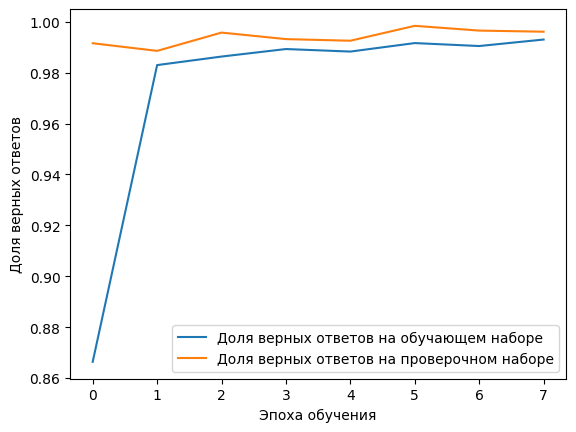

In [25]:
plt.plot(history1.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history1.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

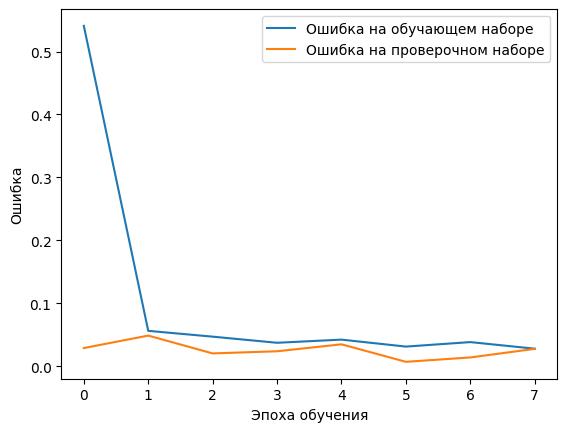

In [26]:
plt.plot(history1.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history1.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Выведем из текстового набора данных изображение фрукта и распознаем его с помощью обученной модели


1/1 [==============================] - 0s 20ms/step
Массив предсказаний  [[1.10297283e-11 4.37703456e-08 1.53305191e-09 5.70571395e-08
  2.18711490e-11 5.21727239e-09 6.35066381e-13 1.47106090e-12
  2.37662771e-11 1.56283826e-13 6.45122011e-11 4.11318268e-09
  7.07573444e-10 6.10485884e-09 2.47124787e-09 2.39223382e-13
  3.41784840e-08 5.04174445e-11 7.24798978e-15 2.79163810e-11
  6.11972539e-12 1.53853235e-13 1.38897656e-06 1.34718743e-08
  3.67637263e-13 8.10138328e-12 8.50465379e-15 1.69263781e-09
  1.57338899e-11 2.86720571e-13 4.48922871e-10 2.88995872e-09
  2.81792900e-09 5.90420768e-11 6.99502820e-08 3.54704326e-07
  7.35292827e-10 1.40926146e-10 9.68445590e-09 2.61819299e-11
  3.12886217e-10 4.89312868e-10 2.11819954e-11 1.02142210e-12
  1.11565361e-10 8.35615268e-13 1.16600759e-05 9.99984622e-01
  2.76962793e-11 8.53398463e-11 7.77682016e-11 7.41713819e-08
  1.74100161e-11 7.80609966e-10 2.16154858e-10 2.52527525e-14
  3.76566644e-13 5.75330272e-09 2.08403191e-11 1.74245340e-

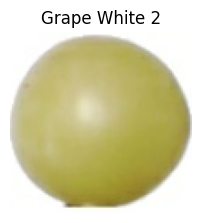

In [28]:
plt.figure(figsize=(8, 8))
for images, labels in test_dataset.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    pred = model1.predict (images[i][np.newaxis, ...])
    print ('Массив предсказаний ', pred)
    print ('Название предсказанного класса', class_names[np.argmax(pred[0])])


## Сохраняем обученную нейронную сеть

In [29]:
model1.save("fruits_360_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download("fruits_360_model.h5")



```
# Выбран кодовый формат
```

Загружаем модель

In [30]:
from PIL import Image
import pandas as pd
import numpy as np

In [31]:
def Download():
  uploaded = files.upload()
  image=str(uploaded)
  image = image.split("'")
  with Image.open(image[1]) as img:
    img.load()
    img = img.resize((100,100))
  arr = np.array(img)
  arr=np.array([arr])
  pred = model1.predict(arr)
  print ('Название предсказанного класса', class_names[np.argmax(pred[0])])

In [32]:
Download()

Saving Mandarin-Orange-581b2ccb3df78cc2e81b59a0.jpg to Mandarin-Orange-581b2ccb3df78cc2e81b59a0.jpg
1/1 [==============================] - 0s 211ms/step
Название предсказанного класса Pear Red


In [33]:
Download()

Saving banany-krasnye-kupit-s-dostavkoj-buyafruit.webp to banany-krasnye-kupit-s-dostavkoj-buyafruit.webp
1/1 [==============================] - 0s 24ms/step
Название предсказанного класса Carambula


In [34]:
Download()

Saving e37b1d40066282bfee7948eff2baa8b2.jpe to e37b1d40066282bfee7948eff2baa8b2.jpe
1/1 [==============================] - 0s 28ms/step
Название предсказанного класса Tomato 4


In [35]:
Download()

Saving apple027.jpg to apple027.jpg
1/1 [==============================] - 0s 18ms/step
Название предсказанного класса Apple Red 2


#Задание на самостоятельное выполнение

1. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов на
каждом слое.
2. Проведите эксперимент с использованием других функций активации (отличные от примера).
3. Используйте разное количество эпох:  15, 20, 25, 30.
4. Реализуйте метод регуляризации искусственных нейронных сетей для уменьшения переобучения сети (dropout). Цель - получить score качество распознавания на тестовых данных не менее 86%.
5. Напишите функцию, которая позволяет загрузить изображение фрукта с компьютера, далее, предобрабатывает изображение для модели НС и распознает название фрукта. Выходным параметром функции является название фрукта (категориальное значение).
6. Реализуйте вызов функции.